This is one of the final notebooks for use after the Convolutional MNN model has been produced. In this notebook, the models and train, val and test sets generated in ***Final: Hyperband_Tuner_allfiles_more_epochs Neural Network with 93 MAE.ipynb*** are loaded in and the performance on the test set is evaluated. The model is then analysed and its predictions validated. This notebook does not contain the fitting process so the graphs of validation error history cannot be produced. The model and test train and validation sets will need to have bene produced in ***Final: Hyperband_Tuner_allfiles_more_epochs Neural Network with 93 MAE.ipynb*** so that they can be loaded in and analysed in this notebook.

## **Imports and Installing**

Import the necessary python libraries

In [ ]:
from numpy.random import seed
seed(908)
from tensorflow.random import set_seed
set_seed(1908)
from tensorflow.keras.utils import set_random_seed
set_random_seed(1908)


from netCDF4 import Dataset
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import csv
from datetime import datetime
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import PIL
import warnings
from csv import writer
from scipy import ndimage as nd
import random


from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Dense
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

## **Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Load in the Train, Val and Test Sets**

In [ ]:
directory = '/content/gdrive/MyDrive/Colab Notebooks/Data/Train, Test, Val/MNN (rounding fixed)/'
x1_train=np.load(directory+'x1_train.npy')
x2_train=np.load(directory+'x2_train.npy')
y_train=np.load(directory+'y_train.npy')
x1_val=np.load(directory+'x1_val.npy')
x2_val=np.load(directory+'x2_val.npy')
y_val=np.load(directory+'y_val.npy')
x1_test=np.load(directory+'x1_test.npy')
x2_test=np.load(directory+'x2_test.npy')
y_test=np.load(directory+'y_test.npy')

## **Load in the Fitted Model**

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/Models/RoundingFixedTunerModel14A7H64BS200EFinalModel')

## **Analyse the Model**

Plot the model

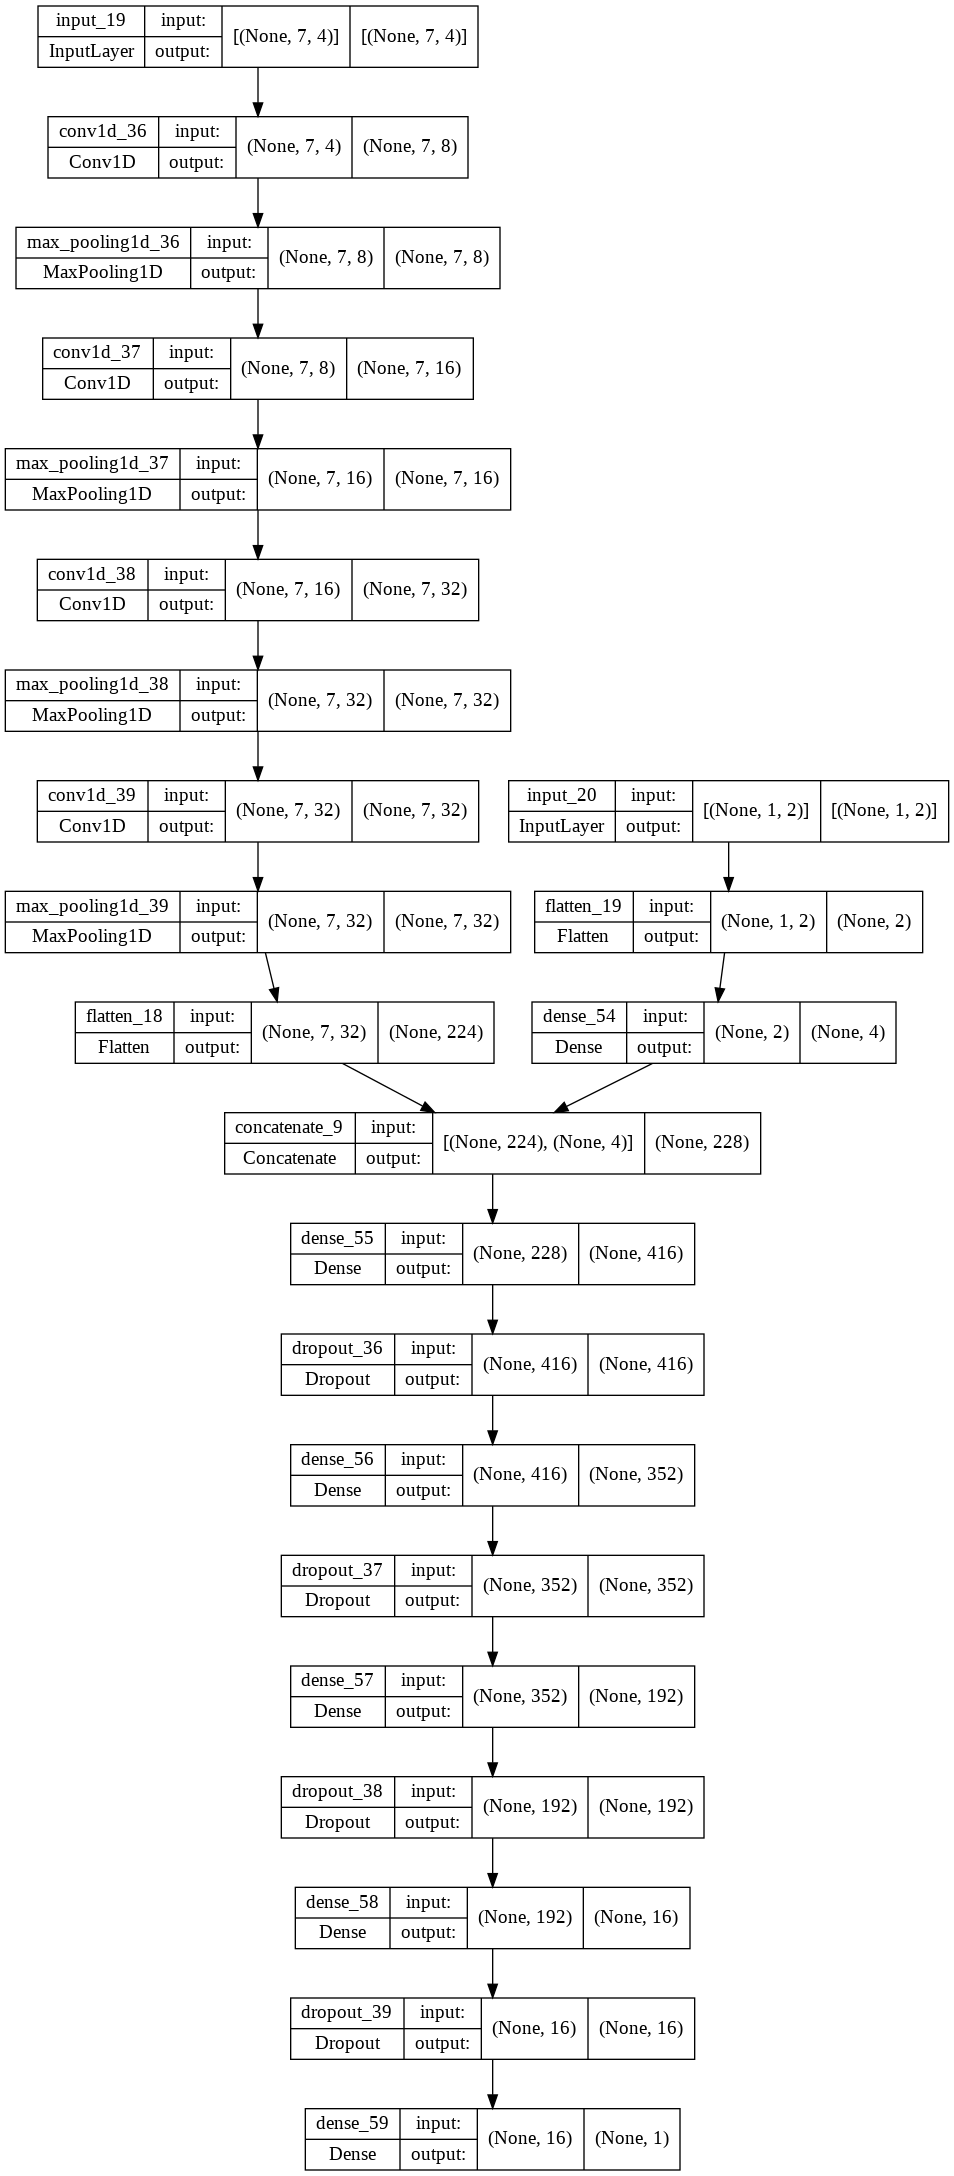

In [ ]:
keras.utils.plot_model(model, "double-headed CNN.png", show_shapes=True)

Print the test accuracy we have achieved

In [ ]:
test_loss, test_acc = model.evaluate([x1_test, x2_test], y_test, batch_size=2048)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

130/130 [==============================] - 5s 35ms/step - loss: 30279.1641 - mae: 89.6351
Test accuracy: 89.635
Test loss: 30279.164


Print the validation accuracy we have achieved

In [ ]:
val_loss, val_acc = model.evaluate([x1_val, x2_val], y_val, batch_size=2048)
print(f"Val accuracy: {val_acc:.3f}")
print(f"Val loss: {val_loss:.3f}")

130/130 [==============================] - 4s 34ms/step - loss: 30586.5117 - mae: 90.1923
Val accuracy: 90.192
Val loss: 30586.512


Use the model to make predictions on the test data and explicitly store these in a predictions variable

In [ ]:
predictions=model.predict([x1_test,x2_test])
print(predictions.shape)
print(y_test.shape)

(265146, 1)
(265146, 1)


Plot the predictions and the true labels on the same histogram to compare the model's predictions to the ground truth data

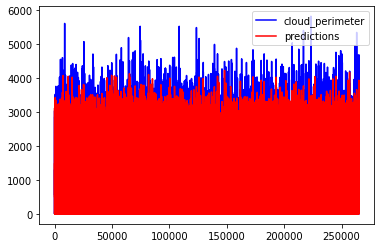

In [ ]:
x_range=range(len(predictions))
predictions=tf.squeeze(predictions)
y_test=tf.squeeze(y_test)
plt.plot(x_range,y_test,color='blue',label='cloud_perimeter')
plt.plot(x_range,predictions,color='red',label='predictions')
plt.legend()
plt.show()

Assert that the removal of all data points with a zero cloud fraction has removed all data points with a zero cloud perimeter (this is a sanity check which checks that the data has been cleaned correctly)

In [ ]:
zero_perimeters = y_test[y_test==0]
print(len(zero_perimeters)/len(y_test))

0.0


Plot a histogram of the predictions

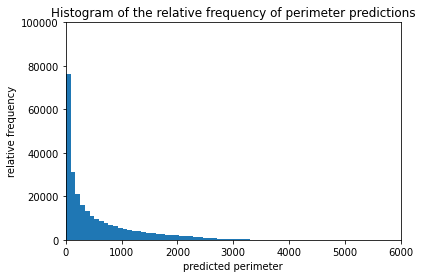

In [ ]:
plt.hist(predictions,bins=50)
plt.ylim((0,100000))
plt.xlim((0,6000))
plt.title('Histogram of the relative frequency of perimeter predictions')
plt.xlabel('predicted perimeter')
plt.ylabel('relative frequency')
plt.show()

Plot the equivalent histogram for the true labels

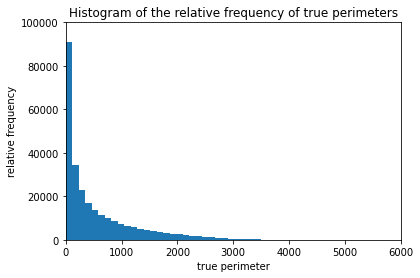

In [ ]:
plt.hist(y_test,bins=50)
plt.ylim((0,100000))
plt.xlim((0,6000))
plt.title('Histogram of the relative frequency of true perimeters')
plt.xlabel('true perimeter')
plt.ylabel('relative frequency')
plt.show()

Compute the mean average percentage error using the mae of the model

In [ ]:
test_acc/np.mean(y_test)

0.16106338939843745

Find the equivalent mean average percentage error of a naive prediction which just predicts the mean perimeter on the training data for every single test data point

In [ ]:
print(np.mean(np.absolute(y_test - np.mean(y_train)))/np.mean(y_test))

0.9283174075460416


Plot a scatter graph of the predictions against the true labels to see if there is a good correlation

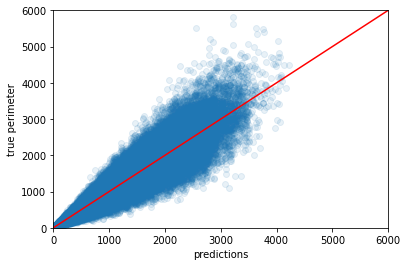

In [ ]:
x=range(6000)
plt.scatter(predictions,y_test,alpha=0.1)
plt.xlabel('predictions')
plt.ylabel('true perimeter')
plt.ylim((0,6000))
plt.xlim((0,6000))
plt.plot(x,x,color='red')
plt.show()

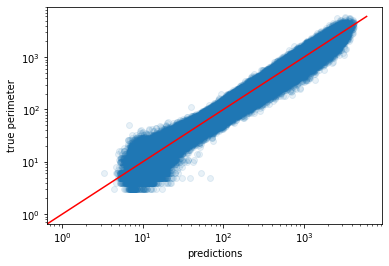

In [ ]:
x=range(6000)
plt.scatter(predictions,y_test,alpha=0.1)
plt.xlabel('predictions')
plt.ylabel('true perimeter')
plt.yscale('log')
plt.xscale('log')
plt.plot(x,x,color='red')
plt.show()

In [ ]:
print(y_test)

[[ 626.]
 [ 193.]
 [  11.]
 ...
 [1507.]
 [ 635.]
 [ 546.]]


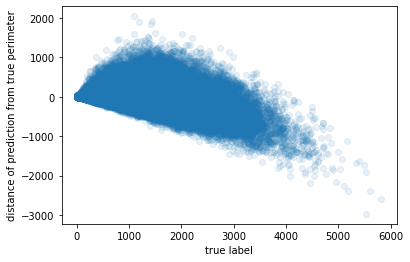

In [ ]:
prediction_distance = np.array(predictions) - np.array(y_test)
plt.scatter(y_test,prediction_distance,alpha=0.1)
plt.xlabel('true label')
plt.ylabel('distance of prediction from true perimeter')
plt.show()

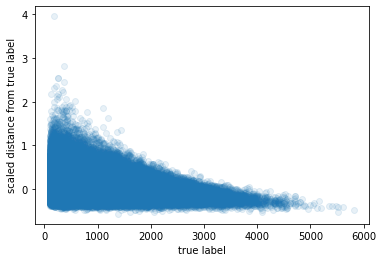

In [ ]:
x=range(len(y_test))
scaled_prediction_distance = (np.array(predictions[y_test>100]) - np.array(y_test[y_test>100]))/y_test[y_test>100]
plt.scatter(y_test[y_test>100],scaled_prediction_distance,alpha=0.1)
plt.xlabel('true label')
plt.ylabel('scaled distance from true label')
plt.show()

We now compare the predictions to a baseline detailed in *Improvements to a prognostic cloud scheme through changes to its cloud erosion parametrization* (Morcrette, 2012) which hypothesises a relationship of $P = \alpha F(1-F)$ where $P$ and $F$ are the perimeter and fraction respectively. The function below finds the optimal alpha from a search range and then computes the mean absolute percentage error using this prediction, for comparison with our model.

In [ ]:
def find_alpha(x2_train,y_train,y_test):
  #set the first mae to be the naive prediction of the mean for all points
  y_test=y_test/16200
  y_train=y_train/16200
  optimal_mae = np.mean(np.absolute(y_test - np.mean(y_train)))
  optimal_alpha = 0
  cloud_fraction = x2_train[:,:,0]
  y_train = y_train[:,0]
  mean_absolute_error_vector = []
  for step in range(100):
        alpha = step/100
        predicted_perimeter = []
        predicted_perimeter = np.multiply(cloud_fraction[:,0],(1-cloud_fraction[:,0]))
        predicted_perimeter = alpha*predicted_perimeter
        predicted_perimeter -= y_train
        predicted_perimeter = predicted_perimeter*(-1)
        mean_absolute_error = np.mean(np.absolute(predicted_perimeter))
        del predicted_perimeter
        mean_absolute_error_vector.append(mean_absolute_error)
        if mean_absolute_error < optimal_mae:
              optimal_mae = mean_absolute_error
              optimal_alpha = alpha
  mean_absolute_error_vector = np.array(mean_absolute_error_vector)
  x=np.linspace(0,1,100)
  plt.scatter(x,mean_absolute_error_vector)
  plt.xlabel('alpha')
  plt.ylabel('mean absolute error')
  plt.show()

  return optimal_mae, optimal_alpha



In [ ]:
def compute_on_test_set(optimal_alpha,x2_test,y_test):
        y_test=y_test/16200
        #work out the error on the test set
        cloud_fraction = x2_test[:,:,0]
        test_predicted_perimeter = []
        for j in range(cloud_fraction.shape[0]):
              test_predicted_perimeter.append(optimal_alpha*cloud_fraction[j,0]*(1-cloud_fraction[j,0]))
        test_predicted_perimeter = np.array(test_predicted_perimeter)
        print(test_predicted_perimeter.shape)
        print(y_test.shape)
        final_mae = np.mean(np.absolute(y_test - test_predicted_perimeter))
        return final_mae


The percentage error is found to be 24%

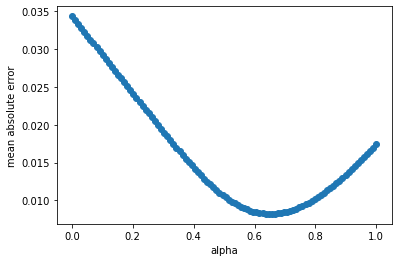

(265146,)
(265146,)
0.00817292503819905
0.64
Average percentage error = 0.23790916711156504


In [ ]:
optimal_mae, optimal_alpha = find_alpha(x2_train,y_train,y_test)
final_mae = compute_on_test_set(optimal_alpha,x2_test,y_test)
print(final_mae)
print(optimal_alpha)
print('Average percentage error =', final_mae/np.mean(y_test/16200))

We plot a graph of cloud fraction against normalised cloud perimeter and overlay the derived relationship over the top. It is clear that this is a good (essentially optimal) reflection of the relationship between cloud fraction and cloud perimeter. Therefore, our neural network must be finding more useful data in the height and atmospheric variables arrays with which to lower the error and make better predictions

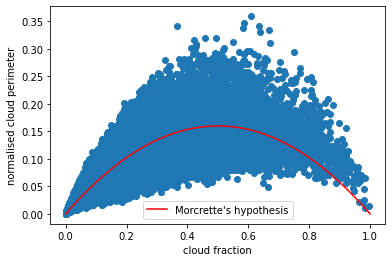

In [ ]:
x=np.linspace(0,1,100)
plt.scatter(x2_test[:,0,0],y_test/16200)
plt.plot(x,0.64*x*(1-x),color='red',label="Morcrette's hypothesis")
plt.xlabel('cloud fraction')
plt.ylabel('normalised cloud perimeter')
plt.legend()
plt.show()